In [72]:
from shift_stack_moons import shift_and_stack
from astropy.io import fits, ascii
import numpy as np
import matplotlib.pyplot as plt
import os
from astroquery.jplhorizons import Horizons

In [73]:
# find filenames
data_dir = '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/'
data_files = os.listdir(data_dir)
instrument = 'nirc2'
stem = 'urh12' #some subset of all the frames over the course of the night
obscode = '568' #Keck JPL Horizons obs code
code = 'Puck'
date = '2019-11-04'
tstart = date+' 00:00'
tend = date+' 23:59'
perturbation_experiment = False
outfname = f"{stem}_{code}_{date}.fits"
fnames = [data_dir+s for s in data_files if s.startswith(stem)]
fnames = np.sort(fnames)
#print(fnames)

In [74]:
## get ephemeris from Horizons. quantity 6 is the satellite relative position to parent in arcsec
horizons_obj = Horizons(
    id=code,
    location=obscode,
    epochs={"start": tstart, "stop": tend, "step": "1m"},
)
ephem = horizons_obj.ephemerides(quantities=6) #.to_pandas()
#ephem.write('ephem.txt', format='ascii', overwrite=True)

In [75]:
#ephem = ascii.read('ephem.txt')
print(fnames)
fits_out = shift_and_stack(fnames, ephem, instrument=instrument, difference=True, edge_detect=False, diagnostic_plots=False)
#fits_out.writeto(outfname, overwrite=True)

['/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh120.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh121.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh122.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh123.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh124.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh126.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh127.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh128.fits'
 '/Users/emolter/research/keck/observations/nirc2/reduced/2019nov04/urh129.fits']
Processing file 1 out of 9
Processing file 2 out of 9
Processing file 3 out of 9
Processing file 4 out of 9
Processing file 5 out of 9
Processing file 6 out of 9
Processing file 7 out of 9
Processing file 8 out of 9
Processing file 9 out of 9


Creates file urh_Puck_2019-11-04.fits

Total integration time in stack: 1080.0 seconds, which equals (9 frames) * (120 seconds per frame)


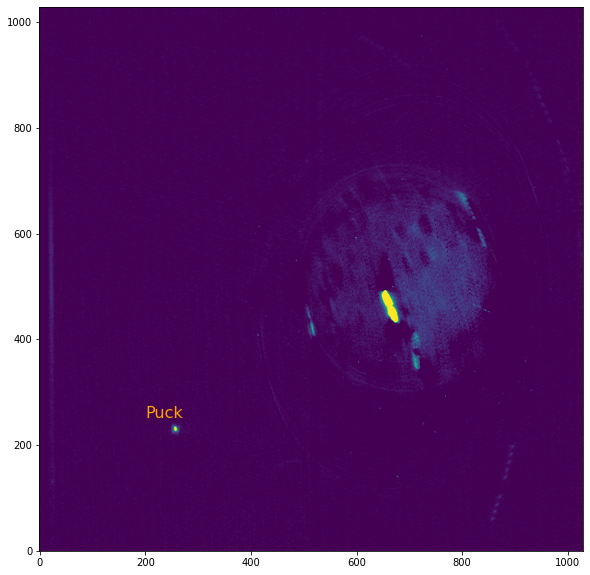

In [76]:
# Visualize the output
stacked_data = fits_out[0].data
print(f'Total integration time in stack: {hdr["ITIME"]} seconds, which equals ({len(fnames)} frames) * (120 seconds per frame)')

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(stacked_data, origin='lower', vmin=0, vmax = stacked_data.max()/4)
ax.text(200, 250, 'Puck', color='orange', fontsize=16)
plt.show()